Using tensorflow, construct and train a CNN for classification of MNIST dataset. Be able to explain details of your implementation and justify the decisions made.

In [34]:
from tensorflow import keras
from keras.datasets import mnist
from keras import Sequential
from keras import layers
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy , MeanSquaredError
from keras.utils import to_categorical
import tensorflow as tf 



In [35]:
(train_images, train_labels), (test_images, test_labels)  = mnist.load_data()

print('MNIST Dataset Shape:')
print('X_train: ' + str(train_images.shape))
print('Y_train: ' + str(train_labels.shape))
print('X_test:  '  + str(test_images.shape))
print('Y_test:  '  + str(test_labels.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


https://poloclub.github.io/cnn-explainer/ 
There is really nice interactive website that's helpful in understanding CNN architecture so I would try to implement it.

https://www.learnpytorch.io/

In [36]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [37]:
# reshaping images adding dimension and converting grayscale to rgb 
train_images = train_images[...,tf.newaxis] # SHape: (N,28,28,1)
test_images = test_images[...,tf.newaxis]
# Convert grayscale images to RGB (from (224, 224, 1) to (224, 224, 3))

# Resize images to (224, 224)
train_images = tf.image.resize(train_images, (224, 224))  # Shape: (N, 224, 224, 1)
test_images = tf.image.resize(test_images, (224, 224))    # Shape: (N, 224, 224, 1)

train_images = tf.image.grayscale_to_rgb(train_images)  # Shape: (N, 224, 224, 3)
test_images = tf.image.grayscale_to_rgb(test_images)    # Shape: (N, 224, 224, 3)



In [38]:
print('MNIST Dataset Shape after reshapign:')
print('X_train: ' + str(train_images.shape))
print('Y_train: ' + str(train_labels.shape))
print('X_test:  '  + str(test_images.shape))
print('Y_test:  '  + str(test_labels.shape))

MNIST Dataset Shape after reshapign:
X_train: (60000, 224, 224, 3)
Y_train: (60000,)
X_test:  (10000, 224, 224, 3)
Y_test:  (10000,)


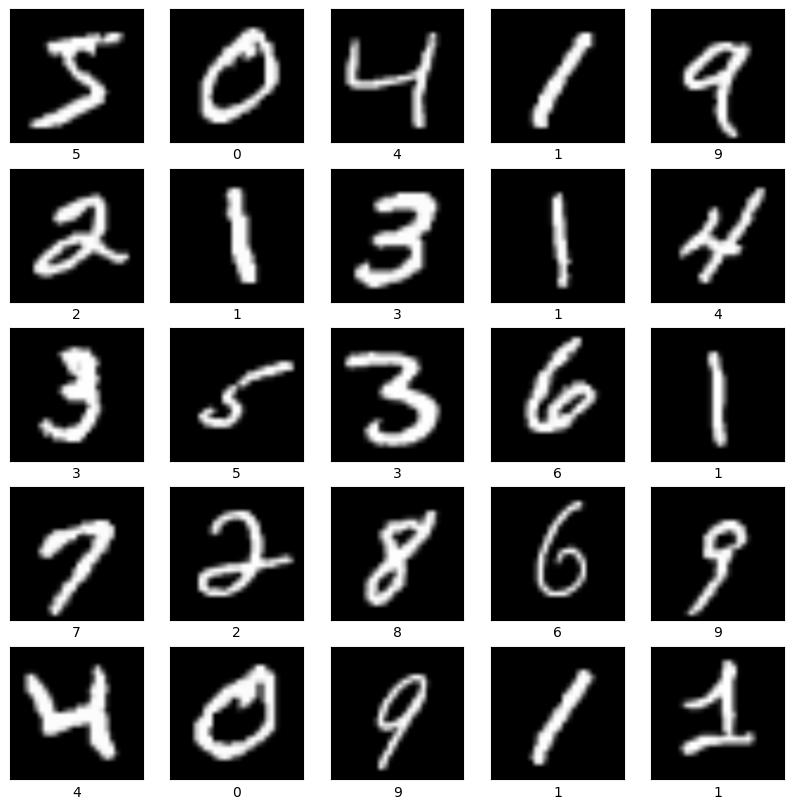

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # which is why you need the extra index
    plt.xlabel(train_labels[i])
plt.show()

In [40]:
train_labels , test_labels = to_categorical(train_labels, num_classes=10), to_categorical(test_labels,num_classes = 10) # 1 hot encoding 

In [41]:
train_images.shape

TensorShape([60000, 224, 224, 3])

In [42]:

# building Tiny VGG network
NUM_CLASSES = 10 
model = Sequential()
model.add(layers.Conv2D(filters = 10, kernel_size = (3,3) , activation= 'relu'))
model.add(layers.Conv2D(filters = 10, kernel_size = (3,3) , activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters = 10, kernel_size = (3,3) , activation= 'relu'))
model.add(layers.Conv2D(filters = 10, kernel_size = (3,3) , activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))





In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam',
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.8972 - loss: 0.3347 - val_accuracy: 0.9702 - val_loss: 0.0954
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9746 - loss: 0.0843 - val_accuracy: 0.9749 - val_loss: 0.0802
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9835 - loss: 0.0534 - val_accuracy: 0.9776 - val_loss: 0.0721
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9869 - loss: 0.0396 - val_accuracy: 0.9781 - val_loss: 0.0709
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9900 - loss: 0.0291 - val_accuracy: 0.9769 - val_loss: 0.0854
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9925 - loss: 0.0209 - val_accuracy: 0.9763 - val_loss: 0.0949
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9947 - loss: 0.0158 - val_accuracy: 0.9780 - val_loss: 0.0970
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9957 -

In [45]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


313/313 - 3s - 9ms/step - accuracy: 0.9763 - loss: 0.1145
